<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/13_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 및 데이터 불러오기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/G_ML_2/data/wine.csv",sep=',')

In [ ]:
data.tail()

fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  quality
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[5 rows x 12 columns]

In [ ]:
data.shape

(1599, 12)

# 2. 단일회귀분석

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(data['quality'],sm.add_constant(data['alcohol'])).fit()

In [ ]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.83e-91
Time:                        05:24:01   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [ ]:
model.params

const      1.874975
alcohol    0.360842
dtype: float64

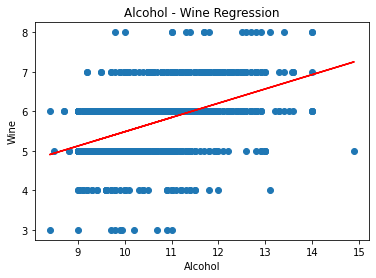

In [ ]:
plt.scatter(data['alcohol'], data['quality'],label = 'Actual Data')
plt.plot(data['alcohol'],model.params[0]+model.params[1]*data['alcohol'],
         c ='r',label="Regression fit")
plt.title('Alcohol - Wine Regression')
plt.xlabel('Alcohol')
plt.ylabel('Wine')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['alcohol'], data["quality"], train_size = 0.7,random_state=42)

In [ ]:
X_train.head()

925     11.0
363     10.2
906     11.0
426     11.4
1251     9.8
Name: alcohol, dtype: float64

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[0.37699262]]
lr.intercept_: [1.69472474]


In [ ]:
print("훈련 세트 R-square: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R-square: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 R-square: 0.24
테스트 세트 R-square: 0.19


# 3. 다중회귀분석

In [ ]:
X=data[data.columns[0:11]]

In [ ]:
y = data[['quality']]

In [ ]:
X.head()

fixed_acidity  volatile_acidity  citric_acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)

In [ ]:
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)

In [ ]:
x_train_new.head()

const  fixed_acidity  volatile_acidity  ...    pH  sulphates  alcohol
925     1.0            8.6              0.22  ...  3.47       0.87     11.0
363     1.0           12.5              0.46  ...  2.99       0.87     10.2
906     1.0            7.2              0.54  ...  3.39       0.71     11.0
426     1.0            6.4              0.67  ...  3.49       0.49     11.4
1251    1.0            7.5              0.58  ...  3.28       0.59      9.8

[5 rows x 12 columns]

In [ ]:
multi_model = sm.OLS(y_train,x_train_new).fit()
print (multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          8.34e-100
Time:                        05:24:02   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626 

In [ ]:
y_pred = multi_model.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)

In [ ]:
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

In [ ]:
pred_data.head()

y_pred  y_test
803   5.356763       6
124   5.090715       5
350   5.625538       6
682   5.448861       5
1326  5.744784       6

In [ ]:
multi_model2 = sm.OLS(y_test,x_test_new).fit()
print (multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     25.22
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.60e-41
Time:                        05:24:02   Log-Likelihood:                -460.03
No. Observations:                 480   AIC:                             944.1
Df Residuals:                     468   BIC:                             994.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   30.8445 

# 4. scikit-learn을 이용한 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear1=LinearRegression()

In [ ]:
linear1.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear1.score(X_train, y_train)

0.3611982441321644

In [ ]:
linear1.score(X_test, y_test)

0.35138853325173947

In [ ]:
pred_train=linear1.predict(X_train)

In [ ]:
pred_test=linear1.predict(X_test)

In [ ]:
linear2=LinearRegression(normalize=True)

In [ ]:
linear2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [ ]:
linear2.score(X_train, y_train)

0.3611982441321645

In [ ]:
linear2.score(X_test, y_test)

0.3513885332517398